<a href="https://colab.research.google.com/github/vee234o/AI-Now-Churn-Project/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [178]:
#Load the csv data as a dataframe
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling Dataset.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [179]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [180]:
df.duplicated().sum()

np.int64(0)

In [181]:
#To view missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [182]:
#To separate the categorical and numerical columns
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns
print(cat_col)
print(num_col)

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')


In [183]:
#To view the number of unique values
df[cat_col].nunique()

,0
Surname,2932
Geography,3
Gender,2


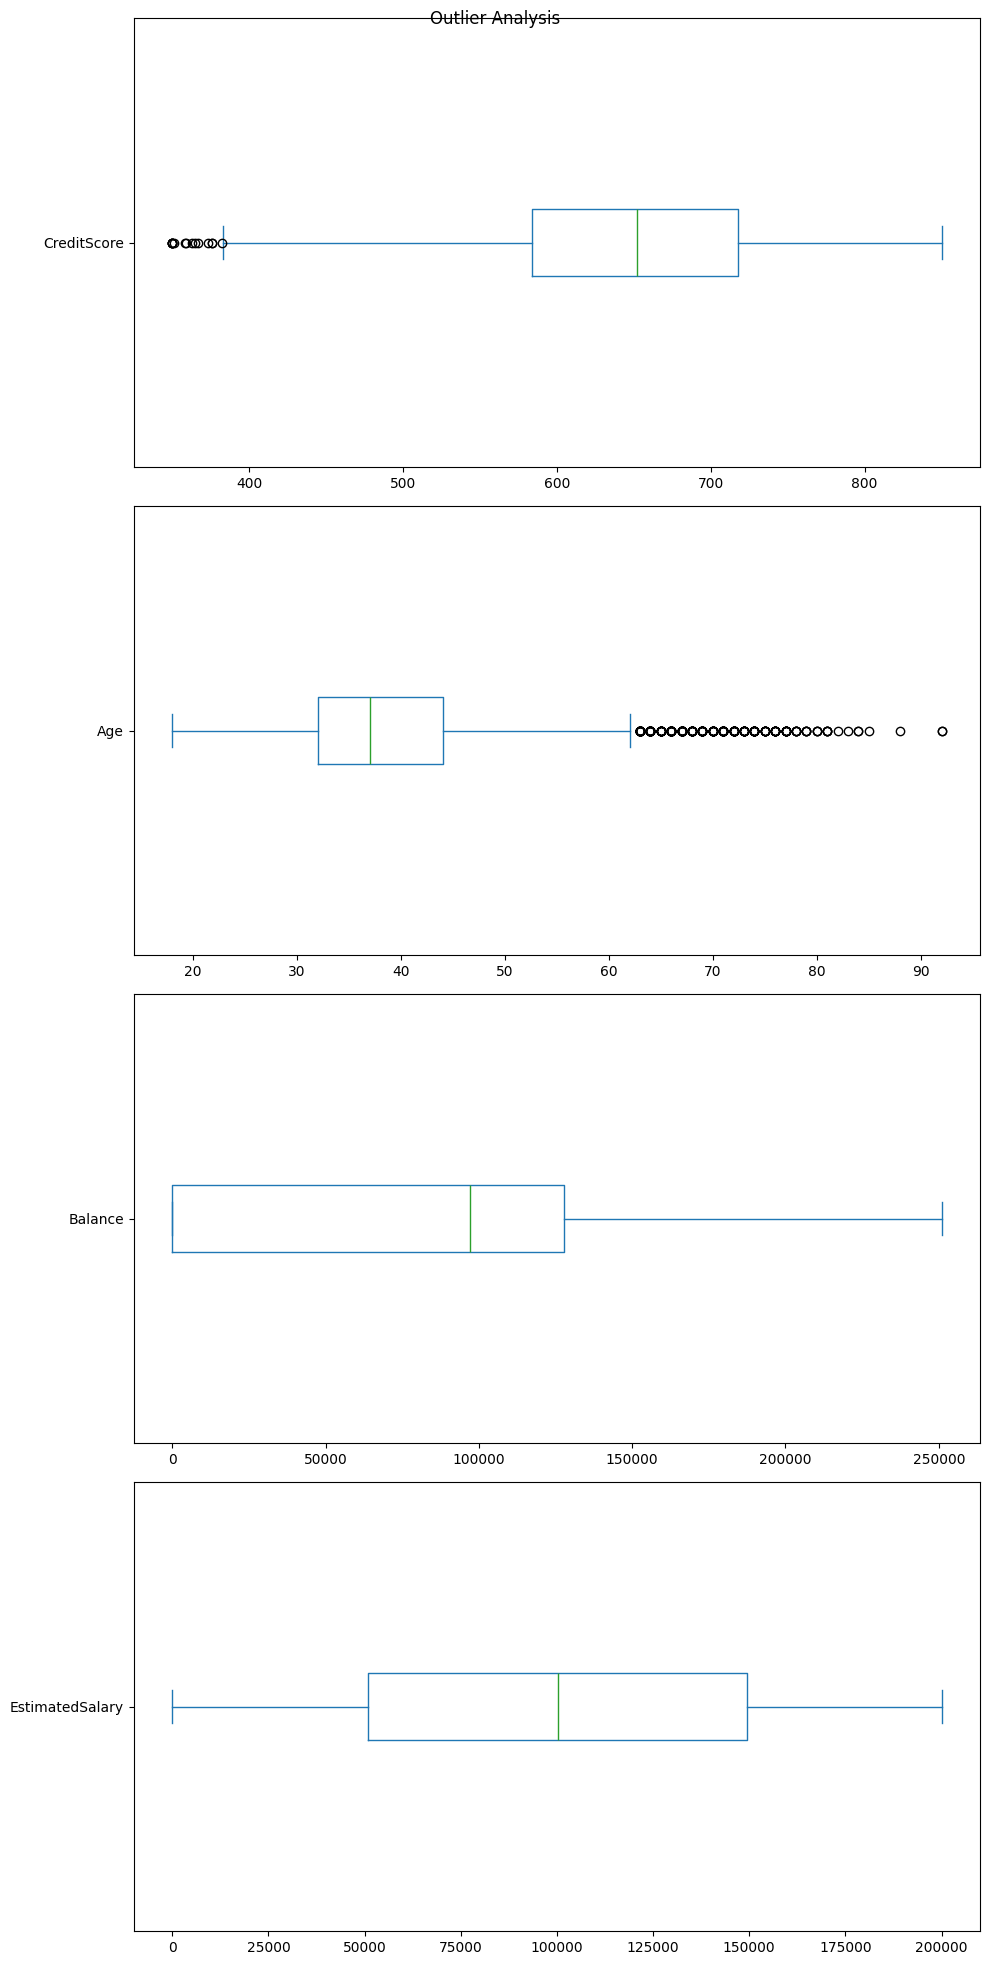

In [184]:
# To check all the outliers
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].plot(
    kind='box',
    subplots=True,
    layout=(4, 1),
    figsize=(10, 20),
    vert = False,
    sharex=False,
    title='Outlier Analysis'
)

plt.tight_layout()
plt.show()

In [185]:
df1 = df.drop(['RowNumber','CustomerId','Surname'], axis=1) #dropping ID columns that dont help predict churn

#Encoding data


In [186]:

if df1['Gender'].dtype == 'object':
    df1['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

df1 = pd.get_dummies(df1, columns=['Geography'], drop_first=True)

/tmp/ipython-input-4013849843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


<Axes: >

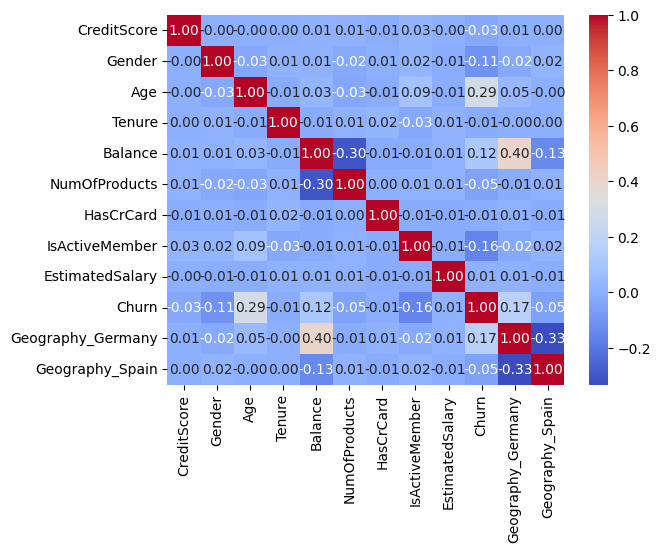

In [187]:
corr = df1.corr()
sns.heatmap(corr, annot=True, fmt = '.2f', cmap ='coolwarm')

In [188]:
print(corr['Churn'].sort_values(ascending = False))

Churn                1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender              -0.106512
IsActiveMember      -0.156128
Name: Churn, dtype: float64


In [189]:
#drop the irrelevant columns(columns that their correlation is approximately 0.01) from your dataframe
irr_cols = ['EstimatedSalary', 'HasCrCard', 'Tenure', 'CreditScore']

df1.drop(columns= irr_cols, inplace=True)

df1.head()

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Churn,Geography_Germany,Geography_Spain
0,0,42,0.00,1,1,1,False,False
1,0,41,83807.86,1,1,0,False,True
2,0,42,159660.80,3,0,1,False,False
3,0,39,0.00,2,0,0,False,False
4,0,43,125510.82,1,1,0,False,True


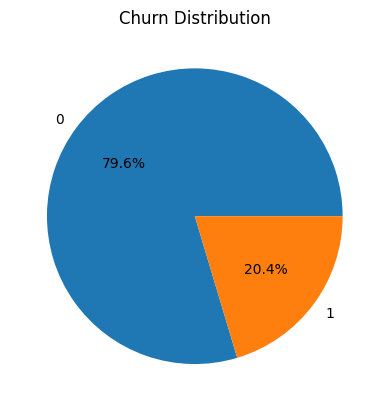

In [190]:
plt.pie(df1['Churn'].value_counts(), labels=df1['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

Most customers in this dataset stayed

In [191]:
x = df1.drop(columns=['Churn'])
y = df1['Churn']
#To split the data set into the training and testing set by 80 and 20%
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#To scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [192]:
#A quick check
print("Training Data", X_train_scaled.shape)
print("Testing Data", X_test_scaled.shape)
print( X_train_scaled[0])

Training Data (8000, 7)
Testing Data (2000, 7)
[ 0.91324755 -0.6557859  -1.21847056  0.80843615  0.97481699 -0.57946723
 -0.57638802]


In [193]:
#Initializing the model
model = LogisticRegression(random_state=42)

#Training the model
model.fit(X_train_scaled, y_train)

# predict y values
y_pred = model.predict(X_test_scaled)



 Accuracy 81.00%


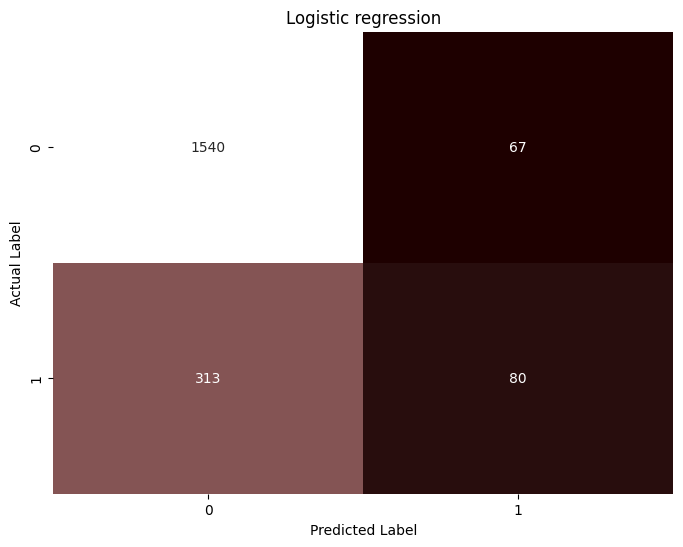

In [194]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy {accuracy * 100:.2f}%")
# 1. Calculate the Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Visualize it nicely
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic regression')
plt.show()

In [195]:
model_balanced = LogisticRegression(random_state=42, class_weight='balanced')

# 2. Train the Model using the fit method
model_balanced.fit(X_train_scaled, y_train)

# predict y values
y_pred = model_balanced.predict(X_test_scaled)

 Accuracy 72.40%


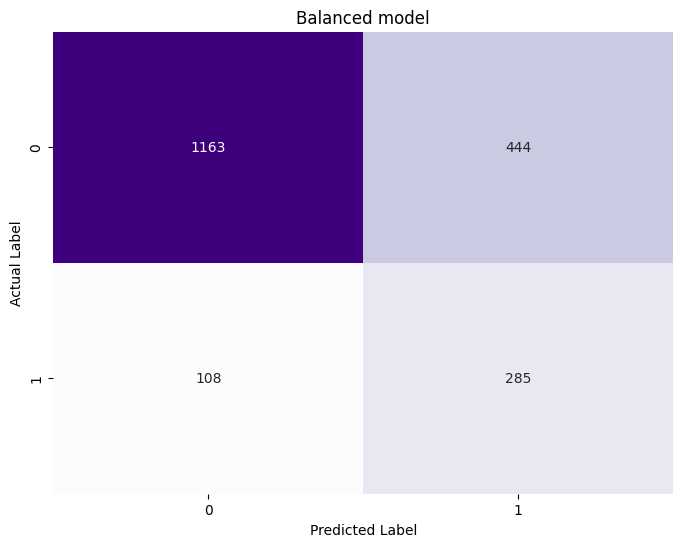

In [196]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy {accuracy * 100:.2f}%")
cm_balanced = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot =True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Balanced model')
plt.show()

I had to change the model used because even after using the argument

```
weight = 'balanced'
```
the model payed more attention to the customers who leave



Accuracy 84.15%


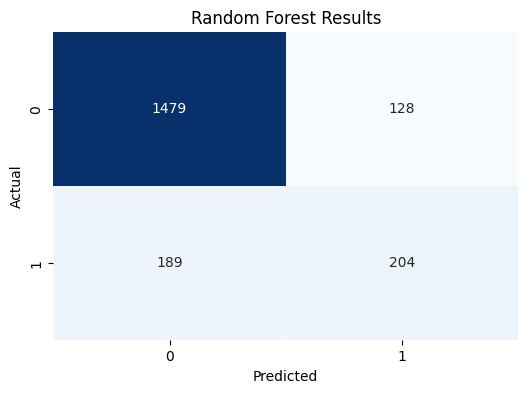

In [197]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf_model.fit(X_train_scaled, y_train)
y_pred= rf_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy {acc*100:.2f}%")

cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Results')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

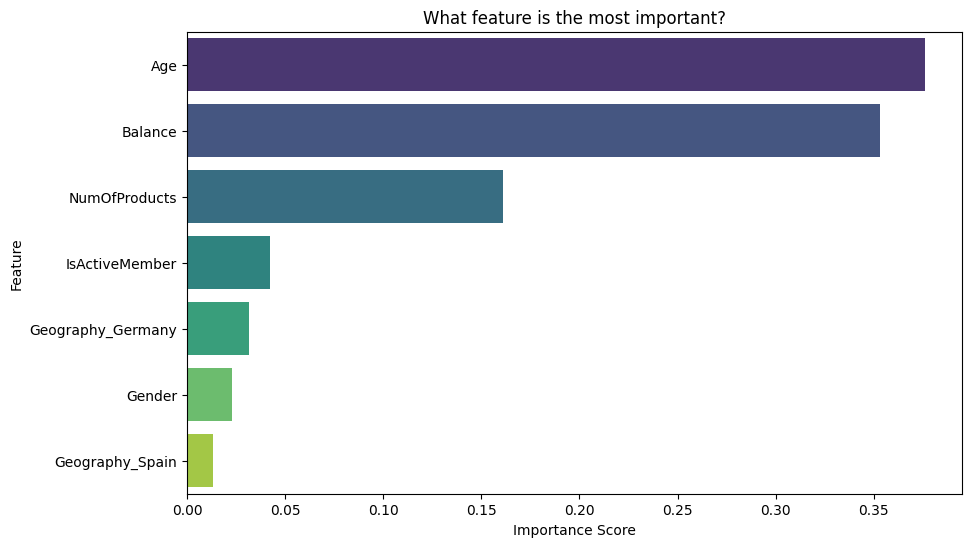

In [198]:

importances = rf_model.feature_importances_

#creating a dataframe with the column names and their importance
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#Sorting them (Highest importance on top)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('What feature is the most important?')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#My Project Conclusion

 **The Problem:** Most customers stay, so it's hard to find the few who leave. My first model was "lazy" it just guessed that everyone would stay.

**The Fix:** I switched to a **Random Forest** model and told it to pay extra attention to the people leaving. This worked much better

##**What I Discovered**
**It's mostly Age:** Older customers are the most likely to quit.

**Money Matters:** People with **high account balances** are actually more likely to leave.

**Activity:** If a member isn't active, they are probably going to close their account.

## **My Advice to the Bank**

**Talk to the older customers:** Make a special loyalty program for people over 45.

**Watch the big accounts:** If someone has a lot of money, give them a personal call so they feel valued.

**Wake up the inactive members:** Send them a small bonus or discount to get them using the app again.